# Stable AWAKEN precursor setup

In [1]:
# Load the amrwind-frontend module

# Location of amrwind-frontend 
amrwindfedirs = ['/projects/wind_uq/lcheung/amrwind-frontend',
                 '/ccs/proj/cfd162/lcheung/amrwind-frontend/']
import sys, os
for x in amrwindfedirs: sys.path.insert(1, x)


# Load the libraries
import amrwind_frontend  as amrwind
import matplotlib.pyplot as plt
import numpy             as np
import math

# Also ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Make all plots inline 
%matplotlib inline

In [2]:
# Add this to load local packages
import sys
sys.path.insert(1, '/ascldap/users/lcheung/.local/lib/python2.7/site-packages')
import utm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load the data from the database of all turbines
df = pd.read_csv('../../uswtdb/uswtdb_v3_3_20210114.csv',low_memory=False)

In [4]:
turbines=[]
addKingPlains     = True
addArmadilloFlats = True
addThunderRanch   = False
addBreckinridge   = True
addChisholmView   = False

### King Plains turbines

In [5]:
KPturbs1=df[df['p_name']=="unknown Noble County"]
KPturbs2=df[df['p_name']=="unknown Garfield County"]

KPcount = 0

if addKingPlains:
    ge2p8='GE2.8-127'
    turblist = []
    # Turbines from Noble County
    for index, row in KPturbs1.iterrows():
        utmxy   = utm.from_latlon(row['ylat'], row['xlong'])
        datarow = {'faa_asn':row['faa_asn'].replace('OE','KP'), 
                   'lat':row['ylat'], 'long':row['xlong'], 'utm':(utmxy[0], utmxy[1]), 
                   't_model':ge2p8}
        turbines.append(datarow)
        KPcount += 1
        if datarow['t_model'] not in turblist: turblist.append(datarow['t_model'])
    
    # Turbines from Garfield County
    for index, row in KPturbs2.iterrows():
        utmxy   = utm.from_latlon(row['ylat'], row['xlong'])
        datarow = {'faa_asn':row['faa_asn'].replace('OE','KP'), 
                   'lat':row['ylat'], 'long':row['xlong'], 'utm':(utmxy[0], utmxy[1]), 
                   't_model':ge2p8}
        if utmxy[1]>4020000:  # Remove the ones from Armadillo Ranch
            turbines.append(datarow)    
            KPcount += 1
        if datarow['t_model'] not in turblist: turblist.append(datarow['t_model'])
        
    print("King Plains: %i turbines"%(KPcount))
    print('Turbine types: '+repr(turblist))

King Plains: 88 turbines
Turbine types: ['GE2.8-127']


### Armadillo flats turbines

In [6]:
# This is the old approach
if addArmadilloFlats and False:
    AFturbs=df[df['p_name']=="Armadillo Flats"]
    turblist = []
    # Turbines from Armadillo Flats
    for index, row in AFturbs.iterrows():
        utmxy   = utm.from_latlon(row['ylat'], row['xlong'])
        datarow = {'faa_asn':str(row['faa_asn']).replace('OE','AF').replace('nan','T'+str(index)), 
                   'lat':row['ylat'], 'long':row['xlong'], 'utm':(utmxy[0], utmxy[1]), 
                   't_model':row['t_model']}
        turbines.append(datarow)
        if datarow['t_model'] not in turblist: turblist.append(datarow['t_model'])
    
    print("Armadillo Flats: %i turbines"%(len(AFturbs)))
    print('Turbine types: '+repr(turblist))
    
# This the new approach
if addArmadilloFlats:
    newdf = pd.read_csv('../../farmlayout/AF_BR_Turbines.csv',low_memory=False)
    AFturbs=newdf[newdf['Turbine Display Name'].str.startswith("WAF1")]
    turblist = []
    turbtypes = []
    # Turbines from Armadillo Flats
    for index, row in AFturbs.iterrows():
        #utmxy   = utm.from_latlon(row['ylat'], row['xlong'])
        name    = row['Turbine Display Name']+'-AF'
        lat     = row['Turbine Latitude']
        long    = row['Turbine Longitude']
        Easting = row['Easting']
        Northing= row['Northing']        
        t_model = row['Turbine Type'].replace('1.7 MW','GE1.7-103').replace('2.3 MW', 'GE2.3-116')
        utmxy   = (Easting, Northing) #(lat, long)
        datarow = {'faa_asn':name, 
                   'lat':lat, 'long':long, 'utm':(utmxy[0], utmxy[1]), 
                   't_model':t_model}
        turbines.append(datarow)
        turbtypes.append(datarow['t_model'])
        if datarow['t_model'] not in turblist: turblist.append(datarow['t_model'])     

    print("Armadillo Flats: %i turbines"%(len(AFturbs)))
    print('Turbine types: '+repr(turblist))
    for t in turblist:
        print("%s: %i"%(t,turbtypes.count(t)))    

Armadillo Flats: 126 turbines
Turbine types: ['GE1.7-103', 'GE2.3-116']
GE1.7-103: 80
GE2.3-116: 46


## Thunder Ranch turbines

In [7]:
TRturbs=df[df['p_name']=="Thunder Ranch"]

In [8]:
if addThunderRanch:
    turblist = []
    for index, row in TRturbs.iterrows():
        utmxy   = utm.from_latlon(row['ylat'], row['xlong'])
        datarow = {'faa_asn':str(row['faa_asn']).replace('OE','TR').replace('nan','T'+str(index)), 
                   'lat':row['ylat'], 'long':row['xlong'], 'utm':(utmxy[0], utmxy[1]), 
                   't_model':row['t_model']}
        turbines.append(datarow)
        if datarow['t_model'] not in turblist: turblist.append(datarow['t_model'])
    print("Thunder Ranch: %i turbines"%(len(TRturbs)))
    print('Turbine types: '+repr(turblist))

## Breckenridge turbines

In [9]:
BRturbs=df[df['p_name']=="Breckinridge"]

In [10]:
if addBreckinridge:
    turblist = []
    for index, row in BRturbs.iterrows():
        utmxy   = utm.from_latlon(row['ylat'], row['xlong'])
        datarow = {'faa_asn':str(row['faa_asn']).replace('OE','BR').replace('nan','T'+str(index)), 
                   'lat':row['ylat'], 'long':row['xlong'], 'utm':(utmxy[0], utmxy[1]), 
                   't_model':row['t_model']}
        turbines.append(datarow)
        if datarow['t_model'] not in turblist: turblist.append(datarow['t_model'])
    print("Breckinridge: %i turbines"%(len(BRturbs)))
    print('Turbine types: '+repr(turblist))

Breckinridge: 57 turbines
Turbine types: ['GE1.7-103']


## Add Chisholm View

In [11]:
CV1turbs=df[df['p_name']=="Chisholm View"]
CV2turbs=df[df['p_name']=="Chisholm View II"]

In [12]:
CVcount = 0

if addChisholmView:
    turblist = []
    for index, row in CV1turbs.iterrows():
        utmxy   = utm.from_latlon(row['ylat'], row['xlong'])
        datarow = {'faa_asn':str(row['faa_asn']).replace('OE','CV').replace('nan','T'+str(index)), 
                   'lat':row['ylat'], 'long':row['xlong'], 'utm':(utmxy[0], utmxy[1]), 
                   't_model':row['t_model']}
        turbines.append(datarow)   
        if datarow['t_model'] not in turblist: turblist.append(datarow['t_model'])
        CVcount += 1
    for index, row in CV2turbs.iterrows():
        utmxy   = utm.from_latlon(row['ylat'], row['xlong'])
        datarow = {'faa_asn':str(row['faa_asn']).replace('OE','CV').replace('nan','T'+str(index)), 
                   'lat':row['ylat'], 'long':row['xlong'], 'utm':(utmxy[0], utmxy[1]), 
                   't_model':row['t_model']}
        turbines.append(datarow)   
        if datarow['t_model'] not in turblist: turblist.append(datarow['t_model'])
        CVcount += 1
    print("Chisholm View: %i turbines"%(CVcount))
    print('Turbine types: '+repr(turblist))

In [13]:
print("Total turbines: %i"%(len(turbines)))

Total turbines: 271


### Write the CSV file

In [14]:
summitcsv = 'SummitLayout_Stable6.csv'

verbose=False

# CSV file should have columns with
# name, x, y, type, yaw, hubheight, options
header="""# name, x, y, type, yaw, hubheight, options"""
with open(summitcsv, 'w') as f:
    f.write(header+'\n')
    if verbose: print(header)
    for x in turbines: 
        #line='%s, %f, %f, %s, , ,'%(x['faa_asn'], x['lat'], x['long'], 'Summit_'+x['t_model'])
        line='%s, %f, %f, %s, , ,'%(x['faa_asn'], x['utm'][0], x['utm'][1], 'Summit_'+x['t_model'])
        f.write(line+'\n')
        if verbose: print(line)

## AWAKEN Wind farm layout for Summit

**Note**: to make sure that the correct turbines are in place for setting up this layout file, make sure something like this file is in place:

In [15]:
with open("../../turbines/summitlayoutturbs.yaml")as f: print(f.read())

turbines:
  Joukowski_GE1p68-82.5_calibLCC:
    turbinetype_name:            "Summit_GE1.68-82.5"
    turbinetype_comment:         Calibrated Joukowski Model 
    # See data in /projects/AWAKEN/lcheung/awaken.github/TurbineCheckout/NREL-1.68-82.5.csv 
    # Calibration notebook in ~/nscratch/2021/AWAKEN/turbinerun/GE1.68-82.5/RunCalibration_Joukowski_Eps5.00_V10_newcurves.ipynb
    # Plot curves notebook in ~/nscratch/2021/AWAKEN/turbinerun/GE1.68-82.5/PlotCurves5.ipynb
    cp_table:                     0.3016713057677416 0.39345186124735865 0.3932593872884728 0.3916920326945722 0.39000648367796215 0.3884360746578687 0.387129236715039 0.386181402329401 0.38565332474606967 0.38557671355846646 0.38519215792947603 0.38432907066672434 0.38861989389694285 0.4062033815759146 0.40357836305334926 0.37955694089972913 0.34474609939979 0.30627114196178934 0.268216840493811 0.24923712453314853 0.22172972498450214 0.17367047677103206 0.13664974727612442 0.1082060950027497 0.08634223902504749 0.0694

## Set up the ABL parameters and conditions

In [16]:
# Start the AMR-Wind case
case = amrwind.MyApp.init_nogui()

In [17]:
WS     = 10.05         # Wind speed, m/s
WDir   = 175           # Wind direction, degrees
farm_domainsize = [4*10240.0, 4*10240.0, 960]
farm_center     = [630000, 4.0235E6]   # In utm
#print(utm.from_latlon(36.587395, -97.756294))
#farm_center          = utm.to_latlon(640000, 4030000, 14, 'S')
print("Farm center = "+repr(farm_center)) # in lat/long
farm_background_mesh = 5 

Farm center = [630000, 4023500.0]


In [18]:
# Set the wind speed and direction
case.setAMRWindInput('useWSDir', True)                           # Allows you to specify wind speed + wind direction 
case.setAMRWindInput('ABL_windspeed', WS, forcechange=True)     # Wind speed of 9 m/s
case.setAMRWindInput('ABL_winddir',   WDir, forcechange=True)     # Wind direction of 175 degrees
case.ABL_calculateWindVector()

In [19]:
# Set some tolerances (leave this alone)
tols = """
nodal_proj.mg_rtol                       = 1e-06               
nodal_proj.mg_atol                       = 1e-12               
mac_proj.mg_rtol                         = 1e-06               
mac_proj.mg_atol                         = 1e-12               
diffusion.mg_rtol                        = 1e-06               
diffusion.mg_atol                        = 1e-12               
temperature_diffusion.mg_rtol            = 1e-10               
temperature_diffusion.mg_atol            = 1e-13               
"""
case.loadAMRWindInput(tols, string=True);

In [20]:
case.loadTurbineCSVFile(summitcsv)

In [21]:
case.setAMRWindInput('turbines_coordsys', 'utm')

# Set up the domain 
case.setAMRWindInput('turbines_domainsize',         farm_domainsize)
case.setAMRWindInput('turbines_backgroundmeshsize', farm_background_mesh)
case.setAMRWindInput('turbines_autocalccenter',     False)
case.setAMRWindInput('turbines_farmcenter',         [farm_center[0], farm_center[1]])
case.setAMRWindInput('turbines_deleteprev', True)

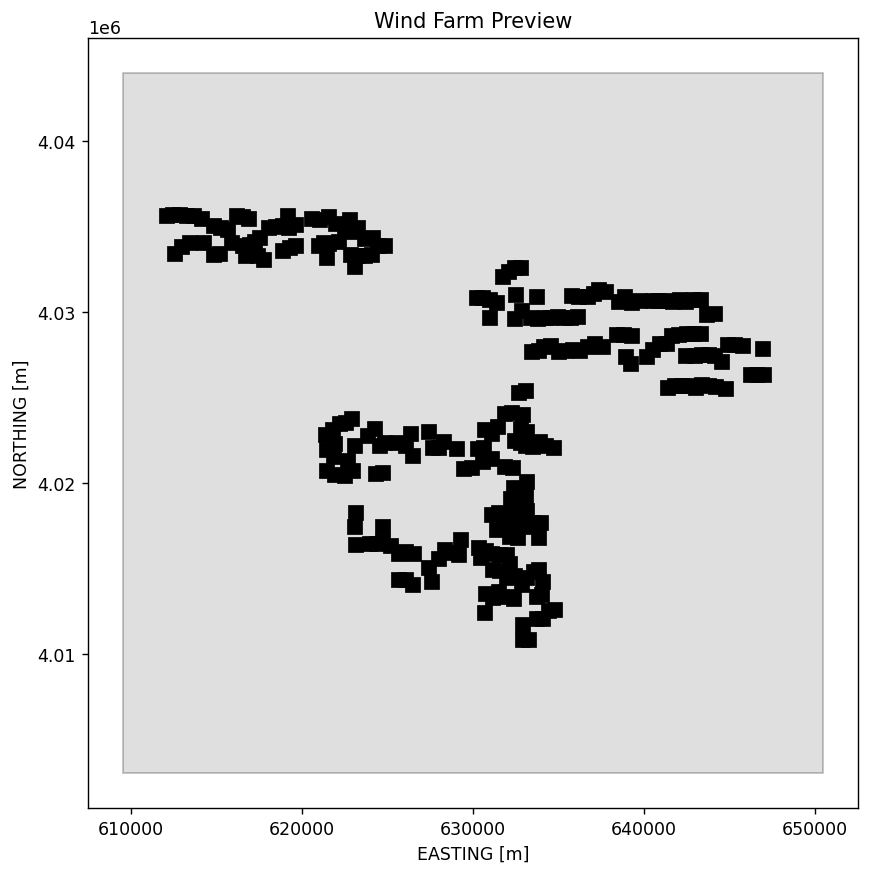

In [22]:
# Preview the turbine layout
fig, ax = plt.subplots(figsize=(8,8), facecolor='w', dpi=125)
case.setAMRWindInput('turbines_plotnames', False)
#case.popup_storteddata['plotdomain']['plot_chooseview']      = 'XY'
case.turbines_previewAllTurbines(ax=ax)

In [23]:
case.getAMRWindInput('turbines_farmcenter')

[630000.0, 4023500.0]

In [24]:
case.turbines_createAllTurbines()

# Print out existing list of turbines, just to confirm that the turbines got made
print(len(case.listboxpopupwindict['listboxactuator'].getitemlist()))

CANNOT update: ABLMeanBoussinesq use forcechange=True in setval()
271


## Add refinements

In [25]:
refinementcsv="""
# CSV file should have columns with
# level, upstream, downstream, lateral, below, above, options
level, upstream, downstream, lateral, below, above, options
#0,     13800,    15000,      18500,  100,  250,      center:farm units:meter
# KP
0,     6000,    6000,      9300,  100,  350, center:specified units:meter centerx:639000 centery:4029000 centerz:100
# AF
0,     8000,    8000,      8000,  100,  350, center:specified units:meter centerx:628000 centery:4017500 centerz:100   
0,     4000,    3000,      7000,  100,  350, center:specified units:meter centerx:618000 centery:4035000 centerz:100
"""
case.setAMRWindInput('refine_csvtextbox', refinementcsv)
case.setAMRWindInput('refine_deleteprev', True)

In [26]:
case.refine_createAllZones()

(607472.0, 652528.0, 4000972.0, 4046028.0)

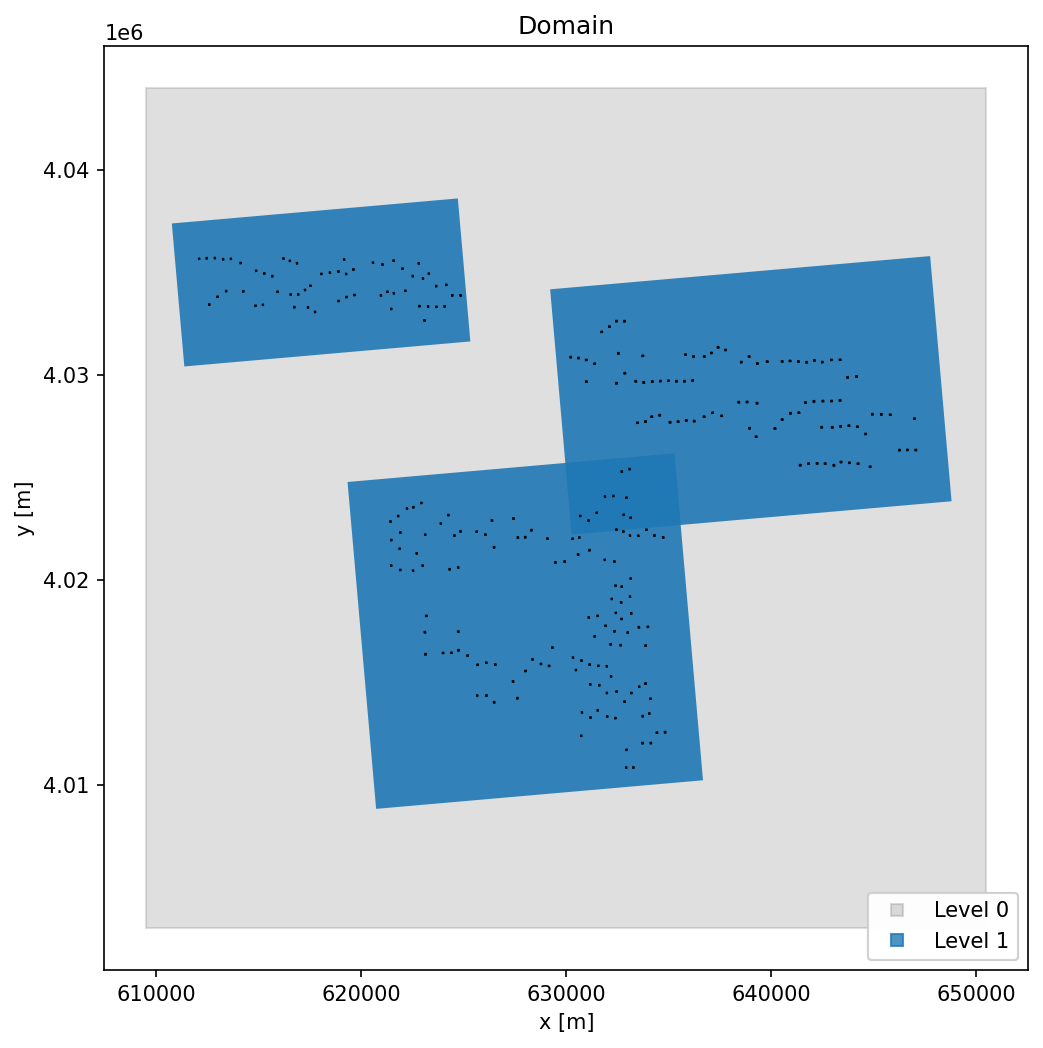

In [27]:
# Plot the domain (total domain)
fig, ax = plt.subplots(figsize=(8,8), facecolor='w', dpi=150)
case.popup_storteddata['plotdomain']['plot_turbines']        = case.listboxpopupwindict['listboxactuator'].getitemlist()
case.popup_storteddata['plotdomain']['plot_refineboxes']     = case.listboxpopupwindict['listboxtagging'].getitemlist()
case.popup_storteddata['plotdomain']['plot_windnortharrows'] = False
case.popup_storteddata['plotdomain']['plot_chooseview']      = 'XY'
case.plotDomain(ax=ax)
ax.axis('scaled')

(607472.0, 652528.0, -370.64858158684046, 1023.3642181708019)

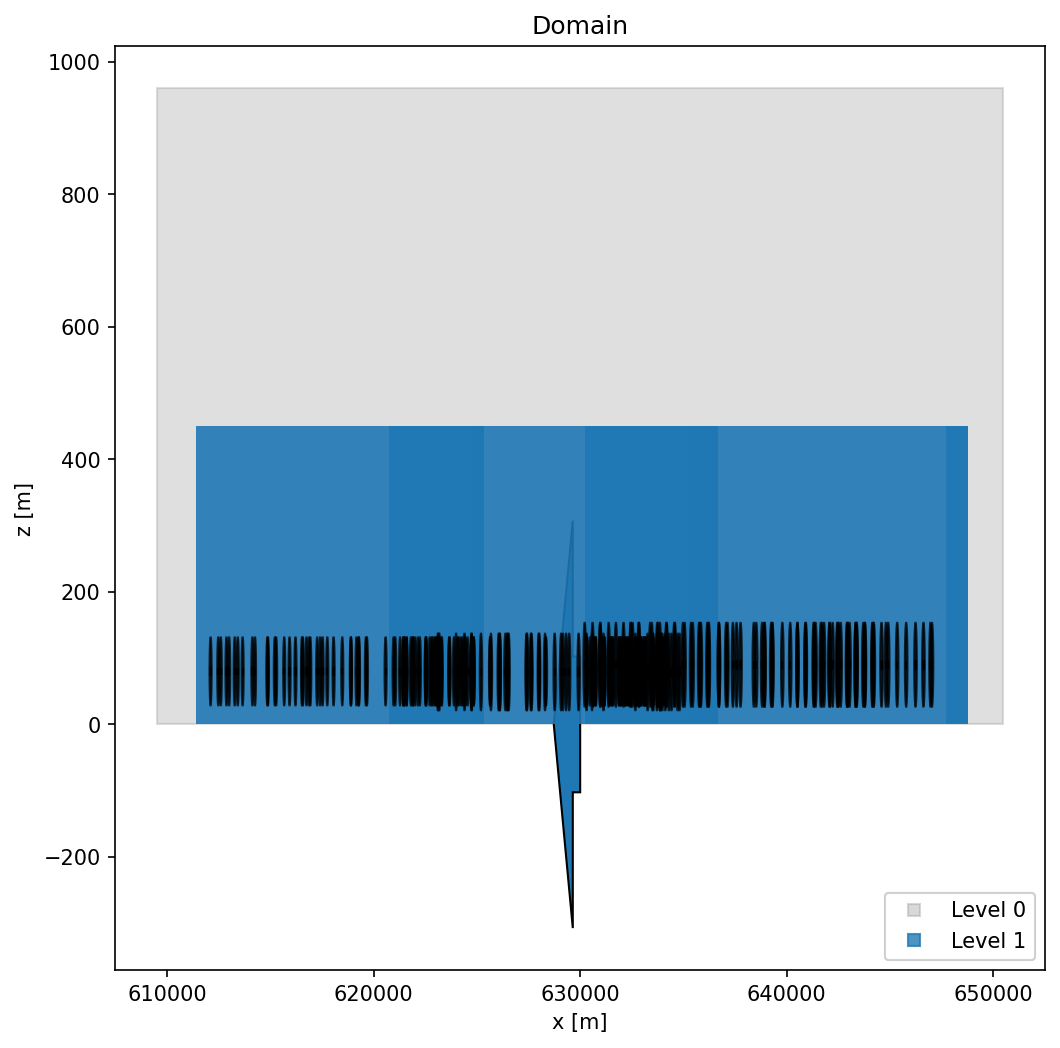

In [28]:
# Plot the domain (total domain)
fig, ax = plt.subplots(figsize=(8,8), facecolor='w', dpi=150)
case.popup_storteddata['plotdomain']['plot_turbines']        = case.listboxpopupwindict['listboxactuator'].getitemlist()
case.popup_storteddata['plotdomain']['plot_refineboxes']     = case.listboxpopupwindict['listboxtagging'].getitemlist()
case.popup_storteddata['plotdomain']['plot_windnortharrows'] = True
case.popup_storteddata['plotdomain']['plot_chooseview']      = 'XZ'
case.plotDomain(ax=ax)
ax.axis('auto')

## Add Radar configuration

In [29]:
# Calculate the turbine origins (in real domain)
radar1origin_nalu = [-18654.500942, 11260.269009, 0.0]  #102.6
radar2origin_nalu = [-13713.865281,941.913201, 0.0]  #78.4

domaincorner      = [610000, 4017500, 0.0]
turbineoffset     = [ 23000, 0, 0.0]

In [30]:
radar1origin_amr = np.array(radar1origin_nalu) + np.array(domaincorner) + np.array(turbineoffset)
radar2origin_amr = np.array(radar2origin_nalu) + np.array(domaincorner) + np.array(turbineoffset)

print(radar1origin_amr)
print(radar2origin_amr)

[ 614345.499058 4028760.269009       0.      ]
[ 619286.134719 4018441.913201       0.      ]


In [31]:
# test plot the radar locations
metmastpprosetup = case.get_default_postprosetupdict()
metmastpprosetup['postprocessing_setup_name'] = 'metmast_'
metmastpprosetup['postprocessing_setup_type'] = 'Sampling'
metmastpprosetup['postprocessing_setup_output_frequency'] =  1
metmastpprosetup['postprocessing_setup_fields']           =  'velocity'
case.add_postprosetup(metmastpprosetup, verbose=True)

sampledict = case.get_default_samplingdict()
sampledict['sampling_name']     = 'metmast_radar1'
sampledict['sampling_outputto'] = 'metmast_'
sampledict['sampling_type']     = 'LineSampler'
sampledict['sampling_l_num_points'] = 50
sampledict['sampling_l_start']      = radar1origin_amr
sampledict['sampling_l_end']        = radar1origin_amr + np.array([0, 0, 200])
case.add_sampling(sampledict, verbose=False)

sampledict = case.get_default_samplingdict()
sampledict['sampling_name']     = 'metmast_radar2'
sampledict['sampling_outputto'] = 'metmast_'
sampledict['sampling_type']     = 'LineSampler'
sampledict['sampling_l_num_points'] = 50
sampledict['sampling_l_start']      = radar2origin_amr
sampledict['sampling_l_end']        = radar2origin_amr + np.array([0, 0, 200])
case.add_sampling(sampledict, verbose=False)


postprocessing_setup_name: 'metmast_'
postprocessing_setup_type: 'Sampling'
postprocessing_setup_output_frequency: 1
postprocessing_setup_fields: 'velocity'
postprocessing_setup_averaging_window: None
postprocessing_setup_averaging_start_time: None
postprocessing_setup_averaging_stop_time: None


### Equivalent AMR-Wind setup
See https://cee-gitlab.sandia.gov/-/snippets/701 for snippet of how to set up radar in the amrwind-frontend

In [32]:
 # Set up the postprocessing for radar
radarpprosetup = case.get_default_postprosetupdict()
radarpprosetup['postprocessing_setup_name'] = 'radaroutput_'        # This is the prefix that will go in front of all output files
radarpprosetup['postprocessing_setup_type'] = 'Sampling'
radarpprosetup['postprocessing_setup_output_frequency'] =  1           # QUESTION FOR NATE: SHOULD THIS ALWAYS BE 1?
radarpprosetup['postprocessing_setup_fields']           =  'velocity'  # QUESTION FOR NATE: Do we need to define this?
case.add_postprosetup(radarpprosetup, verbose=True)

postprocessing_setup_name: 'radaroutput_'
postprocessing_setup_type: 'Sampling'
postprocessing_setup_output_frequency: 1
postprocessing_setup_fields: 'velocity'
postprocessing_setup_averaging_window: None
postprocessing_setup_averaging_start_time: None
postprocessing_setup_averaging_stop_time: None


In [33]:
radar_num_points = 7778
elev_0p0_1p7 = '0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7'
elev_0p1_1p8 = '0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8'

In [34]:
# Add the radar entry
radar1dict = case.get_default_samplingdict()
radar1dict['sampling_name']     = 'radarred1'          # Whatever name you want to call the radar
radar1dict['sampling_outputto'] = 'radaroutput_'          # Send it to the file defined in postprocessing_setup_name above
radar1dict['sampling_type']     = 'RadarSampler'    # Make it a radar sampler

prefix = 'sampling_radar_'
radar1dict[prefix+'num_points']                = radar_num_points 
radar1dict[prefix+'origin']                    = radar1origin_amr + np.array([0.0, 0.0, 22.1])
radar1dict[prefix+'sampling_frequency']        = 85.0
radar1dict[prefix+'device_sampling_frequency'] = 30.0
radar1dict[prefix+'radar_cone_angle']   = 0.25
radar1dict[prefix+'radar_quadrature_type'] = 'truncated_normal_halfpower'
radar1dict[prefix+'radar_npts_azimuth'] = 15   # Same as lines_per_cone_circle?
radar1dict[prefix+'radar_beam_length']  = 35000  
radar1dict[prefix+'angular_speed']      = 30.0
radar1dict[prefix+'sweep_angle']        = 145.0
radar1dict[prefix+'reset_time']         = 1.0
radar1dict[prefix+'elevation_angles']   = elev_0p0_1p7
radar1dict[prefix+'axis']               = [0.9763, 0.2164, 0.0] #[0.9659, 0.2588, 0]  
radar1dict[prefix+'vertical_unit_dir']  = [0.0, 0.0, 1.0]

case.add_sampling(radar1dict, verbose=False)

In [35]:
# Add the radar entry
radar2dict = case.get_default_samplingdict()
radar2dict['sampling_name']     = 'radarred2'          # Whatever name you want to call the radar
radar2dict['sampling_outputto'] = 'radaroutput_'          # Send it to the file defined in postprocessing_setup_name above
radar2dict['sampling_type']     = 'RadarSampler'    # Make it a radar sampler

prefix = 'sampling_radar_'
radar2dict[prefix+'num_points']                = radar_num_points #4667 #2083
radar2dict[prefix+'origin']                    = radar2origin_amr + np.array([0.0, 0.0, 8.5])
radar2dict[prefix+'sampling_frequency']        = 85.0
radar2dict[prefix+'device_sampling_frequency'] = 30.0
radar2dict[prefix+'radar_cone_angle']   = 0.25
radar2dict[prefix+'radar_quadrature_type'] = 'truncated_normal_halfpower'
radar2dict[prefix+'radar_npts_azimuth'] = 15   # Same as lines_per_cone_circle?
radar2dict[prefix+'radar_beam_length']  = 35000  
radar2dict[prefix+'angular_speed']      = 30.0
radar2dict[prefix+'sweep_angle']        = 145.0
radar2dict[prefix+'reset_time']         = 1.0
radar2dict[prefix+'elevation_angles']   = elev_0p1_1p8
radar2dict[prefix+'axis']               = [0.7934, 0.6087, 0.0] #[0.8192, 0.5736, 0] 
radar2dict[prefix+'vertical_unit_dir']  = [0.0, 0.0, 1.0]

case.add_sampling(radar2dict, verbose=False)

In [36]:
# Add the radar entry
radar1dict = case.get_default_samplingdict()
radar1dict['sampling_name']     = 'radarpurple1'          # Whatever name you want to call the radar
radar1dict['sampling_outputto'] = 'radaroutput_'          # Send it to the file defined in postprocessing_setup_name above
radar1dict['sampling_type']     = 'RadarSampler'    # Make it a radar sampler

prefix = 'sampling_radar_'
radar1dict[prefix+'num_points']                = radar_num_points 
radar1dict[prefix+'origin']                    = radar1origin_amr + np.array([0.0, 0.0, 59.6])
radar1dict[prefix+'sampling_frequency']        = 85.0
radar1dict[prefix+'device_sampling_frequency'] = 30.0
radar1dict[prefix+'radar_cone_angle']   = 0.25
radar1dict[prefix+'radar_quadrature_type'] = 'truncated_normal_halfpower'
radar1dict[prefix+'radar_npts_azimuth'] = 15   # Same as lines_per_cone_circle?
radar1dict[prefix+'radar_beam_length']  = 35000  
radar1dict[prefix+'angular_speed']      = 30.0
radar1dict[prefix+'sweep_angle']        = 145.0
radar1dict[prefix+'reset_time']         = 1.0
radar1dict[prefix+'elevation_angles']   = elev_0p0_1p7
radar1dict[prefix+'axis']               = [0.9763, 0.2164, 0.0] #[0.9659, 0.2588, 0]  
radar1dict[prefix+'vertical_unit_dir']  = [0.0, 0.0, 1.0]

case.add_sampling(radar1dict, verbose=False)

In [37]:
# Add the radar entry
radar2dict = case.get_default_samplingdict()
radar2dict['sampling_name']     = 'radarpurple2'          # Whatever name you want to call the radar
radar2dict['sampling_outputto'] = 'radaroutput_'          # Send it to the file defined in postprocessing_setup_name above
radar2dict['sampling_type']     = 'RadarSampler'    # Make it a radar sampler

prefix = 'sampling_radar_'
radar2dict[prefix+'num_points']                = radar_num_points #4667 #2083
radar2dict[prefix+'origin']                    = radar2origin_amr + np.array([0.0, 0.0, 47.8])
radar2dict[prefix+'sampling_frequency']        = 85.0
radar2dict[prefix+'device_sampling_frequency'] = 30.0
radar2dict[prefix+'radar_cone_angle']   = 0.25
radar2dict[prefix+'radar_quadrature_type'] = 'truncated_normal_halfpower'
radar2dict[prefix+'radar_npts_azimuth'] = 15   # Same as lines_per_cone_circle?
radar2dict[prefix+'radar_beam_length']  = 35000  
radar2dict[prefix+'angular_speed']      = 30.0
radar2dict[prefix+'sweep_angle']        = 145.0
radar2dict[prefix+'reset_time']         = 1.0
radar2dict[prefix+'elevation_angles']   = elev_0p1_1p8
radar2dict[prefix+'axis']               = [0.7934, 0.6087, 0.0] #[0.8192, 0.5736, 0] 
radar2dict[prefix+'vertical_unit_dir']  = [0.0, 0.0, 1.0]

case.add_sampling(radar2dict, verbose=False)

In [38]:
# Add the radar entry
radar1dict = case.get_default_samplingdict()
radar1dict['sampling_name']     = 'radargray1'          # Whatever name you want to call the radar
radar1dict['sampling_outputto'] = 'radaroutput_'          # Send it to the file defined in postprocessing_setup_name above
radar1dict['sampling_type']     = 'RadarSampler'    # Make it a radar sampler

prefix = 'sampling_radar_'
radar1dict[prefix+'num_points']                = radar_num_points 
radar1dict[prefix+'origin']                    = radar1origin_amr + np.array([0.0, 0.0, 112.1])
radar1dict[prefix+'sampling_frequency']        = 85.0
radar1dict[prefix+'device_sampling_frequency'] = 30.0
radar1dict[prefix+'radar_cone_angle']   = 0.25
radar1dict[prefix+'radar_quadrature_type'] = 'truncated_normal_halfpower'
radar1dict[prefix+'radar_npts_azimuth'] = 15   # Same as lines_per_cone_circle?
radar1dict[prefix+'radar_beam_length']  = 35000  
radar1dict[prefix+'angular_speed']      = 30.0
radar1dict[prefix+'sweep_angle']        = 145.0
radar1dict[prefix+'reset_time']         = 1.0
radar1dict[prefix+'elevation_angles']   = elev_0p0_1p7
radar1dict[prefix+'axis']               = [0.9763, 0.2164, 0.0] #[0.9659, 0.2588, 0]  
radar1dict[prefix+'vertical_unit_dir']  = [0.0, 0.0, 1.0]

case.add_sampling(radar1dict, verbose=False)

In [39]:
# Add the radar entry
radar2dict = case.get_default_samplingdict()
radar2dict['sampling_name']     = 'radargray2'          # Whatever name you want to call the radar
radar2dict['sampling_outputto'] = 'radaroutput_'          # Send it to the file defined in postprocessing_setup_name above
radar2dict['sampling_type']     = 'RadarSampler'    # Make it a radar sampler

prefix = 'sampling_radar_'
radar2dict[prefix+'num_points']                = radar_num_points #4667 #2083
radar2dict[prefix+'origin']                    = radar2origin_amr + np.array([0.0, 0.0, 92.6])
radar2dict[prefix+'sampling_frequency']        = 85.0
radar2dict[prefix+'device_sampling_frequency'] = 30.0
radar2dict[prefix+'radar_cone_angle']   = 0.25
radar2dict[prefix+'radar_quadrature_type'] = 'truncated_normal_halfpower'
radar2dict[prefix+'radar_npts_azimuth'] = 15   # Same as lines_per_cone_circle?
radar2dict[prefix+'radar_beam_length']  = 35000  
radar2dict[prefix+'angular_speed']      = 30.0
radar2dict[prefix+'sweep_angle']        = 145.0
radar2dict[prefix+'reset_time']         = 1.0
radar2dict[prefix+'elevation_angles']   = elev_0p1_1p8
radar2dict[prefix+'axis']               = [0.7934, 0.6087, 0.0] #[0.8192, 0.5736, 0] 
radar2dict[prefix+'vertical_unit_dir']  = [0.0, 0.0, 1.0]

case.add_sampling(radar2dict, verbose=False)

## Add TTU Cartesian interpolated grid

In [40]:
outputoptions="outputvars:velocity;tke;temperature;velocity_mean outputfreq:10"
sampletemplate="{planename}, hubheight, {upstream},  {downstream}, {lateral},  0, none, 0, 0, orientation:y usedx:{dx} units:meter center:specified centerx:{centerx} centery:{centery} centerz:{centerz} outputto:{planename}_ {outputoptions}\n"

LLcorner = np.array([615000, 4015000])
URfine   = np.array([635000, 4038000])
URcoarse = np.array([647000, 4047000])

levelsZ = np.arange(25, 600-375+0.001, 25)

In [41]:
centercoarse = 0.5*(LLcorner + URcoarse)
centerfine   = 0.5*(LLcorner + URfine)

upstreamcoarse = 0.5*(URcoarse[1] - LLcorner[1])
upstreamfine   = 0.5*(URfine[1] - LLcorner[1])

lateralcoarse  = 0.5*(URcoarse[0] - LLcorner[0])
lateralfine    = 0.5*(URfine[0] - LLcorner[0])


In [42]:
samplingcsv = ""

for z in levelsZ:
    planename = "cartesianRadarCoarse%03.0f"%z
    samplingcsv += sampletemplate.format(planename=planename, upstream=upstreamcoarse, downstream=upstreamcoarse, lateral=lateralcoarse, dx=50, centerx=centercoarse[0], centery=centercoarse[1], centerz=z, outputoptions=outputoptions)
    
for z in levelsZ:
    planename = "cartesianRadarFine%03.0f"%z
    samplingcsv += sampletemplate.format(planename=planename, upstream=upstreamfine, downstream=upstreamfine, lateral=lateralfine, dx=25, centerx=centerfine[0], centery=centerfine[1], centerz=z, outputoptions=outputoptions)

print(samplingcsv)

cartesianRadarCoarse025, hubheight, 16000.0,  16000.0, 16000.0,  0, none, 0, 0, orientation:y usedx:50 units:meter center:specified centerx:631000.0 centery:4031000.0 centerz:25.0 outputto:cartesianRadarCoarse025_ outputvars:velocity;tke;temperature;velocity_mean outputfreq:10
cartesianRadarCoarse050, hubheight, 16000.0,  16000.0, 16000.0,  0, none, 0, 0, orientation:y usedx:50 units:meter center:specified centerx:631000.0 centery:4031000.0 centerz:50.0 outputto:cartesianRadarCoarse050_ outputvars:velocity;tke;temperature;velocity_mean outputfreq:10
cartesianRadarCoarse075, hubheight, 16000.0,  16000.0, 16000.0,  0, none, 0, 0, orientation:y usedx:50 units:meter center:specified centerx:631000.0 centery:4031000.0 centerz:75.0 outputto:cartesianRadarCoarse075_ outputvars:velocity;tke;temperature;velocity_mean outputfreq:10
cartesianRadarCoarse100, hubheight, 16000.0,  16000.0, 16000.0,  0, none, 0, 0, orientation:y usedx:50 units:meter center:specified centerx:631000.0 centery:4031000.0

In [43]:
case.setAMRWindInput('sampling_csvtextbox', samplingcsv)
case.setAMRWindInput('sampling_deleteprev', False)
case.sampling_createAllProbes(verbose=False)

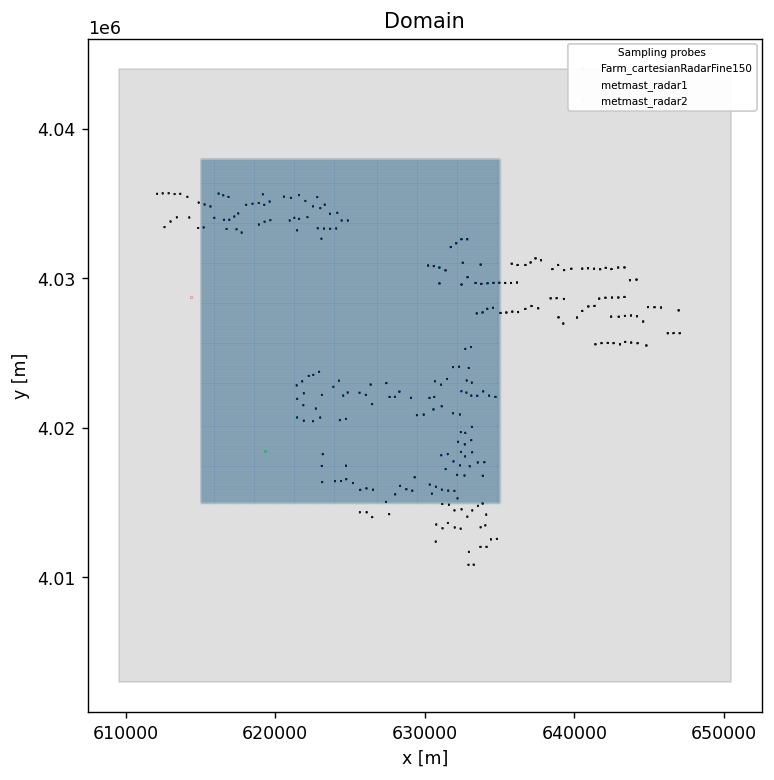

In [44]:
# Plot the domain
fig, ax = plt.subplots(figsize=(7,7), facecolor='w', dpi=125)

# Set any additional items to plot
case.popup_storteddata['plotdomain']['plot_sampleprobes_style']  = "{'markersize':5, 'marker':'.', 'linestyle':'None', 'markersize':0.25, 'alpha':0.05}"
case.popup_storteddata['plotdomain']['plot_sampleprobes_legend'] = "{'title':'Sampling probes', 'fontsize':6, 'loc':'upper right', 'markerscale':2}"
case.popup_storteddata['plotdomain']['plot_sampleprobes']    = [ 'Farm_cartesianRadarFine150', 'metmast_radar1', 'metmast_radar2',] 
#, 'lidar_FraunhoferScanning', 'lidar_FranhoferProfiling'] 
#case.listboxpopupwindict['listboxsampling'].getitemlist() 
case.popup_storteddata['plotdomain']['plot_chooseview']      = 'XY'
case.popup_storteddata['plotdomain']['plot_refineboxes']     = [] 
case.popup_storteddata['plotdomain']['plot_turbines']        = case.listboxpopupwindict['listboxactuator'].getitemlist()
case.popup_storteddata['plotdomain']['plot_windnortharrows'] = False
#start = time.time()
case.plotDomain(ax=ax, verbose=False)

In [45]:
# Set up averaging
metmastpprosetup = case.get_default_postprosetupdict()
metmastpprosetup['postprocessing_setup_name'] = 'sampling'
metmastpprosetup['postprocessing_setup_type'] = 'Sampling'
metmastpprosetup['postprocessing_setup_output_frequency'] =  2000
metmastpprosetup['postprocessing_setup_fields']           =  'velocity'
case.add_postprosetup(metmastpprosetup, verbose=True)

sampleplane = case.get_default_samplingdict()
# Set up a sampling plane at two heights: z=60m and z=91m
sampleplane['sampling_name']         = 'p_hub'
sampleplane['sampling_type']         = 'PlaneSampler'
sampleplane['sampling_p_num_points'] = [421, 351]
sampleplane['sampling_p_origin']     = case.getAMRWindInput('geometry.prob_lo')
sampleplane['sampling_p_axis1']      = [42000, 0, 0]
sampleplane['sampling_p_axis2']      = [0, 35000, 0]
sampleplane['sampling_p_normal']     = [0, 0, 1]      # This is the direction I want to move/offset the planes
sampleplane['sampling_p_offsets']    = '60 91'        # This is how much to offset the planes
case.add_sampling(sampleplane)

postprocessing_setup_name: 'sampling'
postprocessing_setup_type: 'Sampling'
postprocessing_setup_output_frequency: 2000
postprocessing_setup_fields: 'velocity'
postprocessing_setup_averaging_window: None
postprocessing_setup_averaging_start_time: None
postprocessing_setup_averaging_stop_time: None


In [46]:
case.listboxpopupwindict['listboxactuator'].deleteall()
print(case.listboxpopupwindict['listboxactuator'].getitemlist())

[]


In [47]:
# Estimate mesh size
case.estimateMeshSize(verbose=False)

ESTIMATED MESH SIZE
   Level       Ncells                      Cell Size
       0  12884901888                5.0 x 5.0 x 5.0
       1  16623360000                2.5 x 2.5 x 2.5
  TOTAL:  29508261888


Text(0.5, 1.0, 'Simulated AWAKEN Domain')

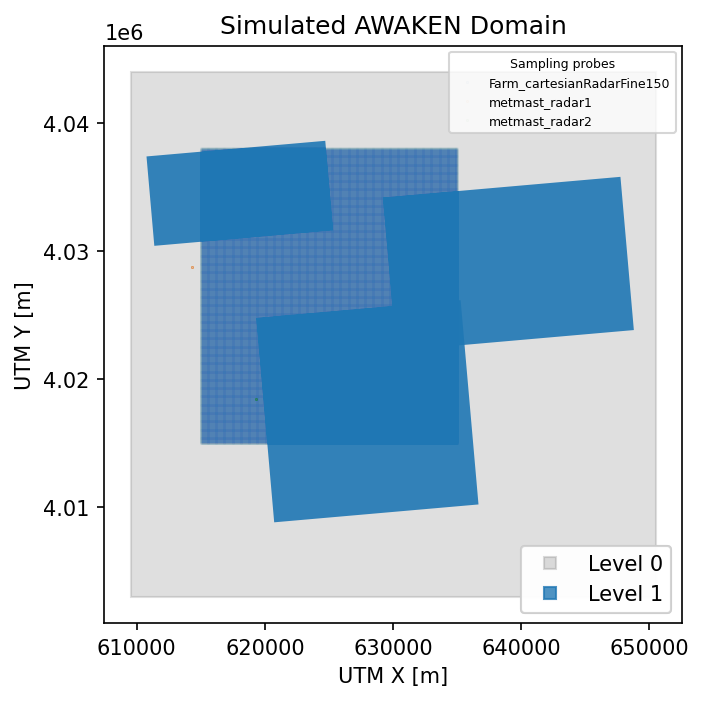

In [48]:
# Plot the domain (total domain)
fig, ax = plt.subplots(figsize=(5,5), facecolor='w', dpi=150)
case.popup_storteddata['plotdomain']['plot_turbines']        = case.listboxpopupwindict['listboxactuator'].getitemlist()
case.popup_storteddata['plotdomain']['plot_refineboxes']     = case.listboxpopupwindict['listboxtagging'].getitemlist()
case.popup_storteddata['plotdomain']['plot_windnortharrows'] = False
case.popup_storteddata['plotdomain']['plot_chooseview']      = 'XY'
#case.popup_storteddata['plotdomain']['plot_sampleprobes']    = ['p_hub']
case.plotDomain(ax=ax)
ax.axis('scaled')
plt.xlabel('UTM X [m]')
plt.ylabel('UTM Y [m]')
plt.title('Simulated AWAKEN Domain')

## Set AMR-Wind inputs

In [49]:
# Set the time constants
maxtime = 30000
dt      = 0.125
#case.setAMRWindInput('time.max_step',  80000)

case.setAMRWindInput('time.stop_time', maxtime)
case.setAMRWindInput('time.max_step',  -1) #int(maxtime/dt))
case.setAMRWindInput('time_control', ['const dt'])
case.setAMRWindInput('time.fixed_dt',  0.1)
case.setAMRWindInput('time.checkpoint_interval',  8000)
case.setAMRWindInput('time.plot_interval',  8000)

In [50]:
# Set some basic parameters
case.setAMRWindInput('incflo.physics',      ['ABL'])  # Must have ABL physics to do ABL calculations
case.setAMRWindInput('incflo.verbose',      3)        # This is optional, verbose=3 means more info in the output logs
case.setAMRWindInput('io.check_file',       'chk')    # What to name the checkpoint files

case.setAMRWindInput('incflo.use_godunov',  True)       # Always use a godunov scheme
case.setAMRWindInput('incflo.godunov_type', 'weno_z')   # Use 'weno_z' 

case.setAMRWindInput('turbulence.model',    ['OneEqKsgsM84'])    # One equation k-sgs subgrid scale model
case.setAMRWindInput('TKE.source_terms',    ['KsgsM84Src'])      # The corresponding source term

case.setAMRWindInput('transport.viscosity', 1.853e-05)           # viscosity
case.setAMRWindInput('incflo.density',      1.17)                # density

In [51]:
# Set the wind speed and direction
case.setAMRWindInput('useWSDir', True)                           # Allows you to specify wind speed + wind direction 
case.setAMRWindInput('ABL_windspeed', WS, forcechange=True)     # Wind speed of 9 m/s
case.setAMRWindInput('ABL_winddir',   WDir, forcechange=True)     # Wind direction of 175 degrees
case.ABL_calculateWindVector()

In [52]:
# This cell sets up boundary conditions
case.setAMRWindInput('is_periodicx', True)     # periodic in x
case.setAMRWindInput('is_periodicy', True)     # periodic in y
case.setAMRWindInput('is_periodicz', False)    # Enforce some boundary conditions in z

# Boundary conditions in z
case.setAMRWindInput('zlo.type',              'wall_model')          
case.setAMRWindInput('zlo.temperature_type',  'wall_model')          
case.setAMRWindInput('zlo.tke_type',          'zero_gradient')       
case.setAMRWindInput('zhi.type',              'slip_wall')           
case.setAMRWindInput('zhi.temperature_type',  'fixed_gradient')      
case.setAMRWindInput('zhi.temperature',       0.00125) 

In [53]:
# Now set up ABL specific forces, parameters, etc.
case.setAMRWindInput('ICNS.source_terms',     ['ABLForcing','BoussinesqBuoyancy', 'CoriolisForcing',])

case.setAMRWindInput('ABL.stats_output_frequency',   1)           # Output ABL stats every iteration            
case.setAMRWindInput('ABL.stats_output_format',   'netcdf')       # Use netcdf output because that's how we postprocess

#case.setAMRWindInput('incflo.velocity',     [8.69, 0.0, 0.0])    # Already taken care of
case.setAMRWindInput('ABLForcing.abl_forcing_height',   91)       # Hub height wind speed you want specify 
case.setAMRWindInput('ABL.kappa',                       0.4)      # Kolmogorov constant

case.setAMRWindInput('ABL.normal_direction',      2)              # vertical is in z
case.setAMRWindInput('ABL.surface_roughness_z0',  0.1)            # Surface roughess, SOMETHING WE WILL PROBABLY WANT TO ITERATE ON
case.setAMRWindInput('ABL.reference_temperature', 303.803)        # Correspond to what was measured at ARM
case.setAMRWindInput('ABL.surface_temp_rate',     -0.07)          # d(Temperature)/dt ---> set this to zero for unstable ABL
case.setAMRWindInput('ABL.surface_temp_flux',     None)           # Surface temperature flux (K*m/s) --> Use this for unstable ABL's (ITERATE ON THIS TOO)

# Monin-Obukhov parameters (No need to change)
case.setAMRWindInput('ABL.mo_beta_m',             16.0)
case.setAMRWindInput('ABL.mo_gamma_m',            5.0)
case.setAMRWindInput('ABL.mo_gamma_h',            5.0)
case.setAMRWindInput('ABL.random_gauss_mean',     0.0)
case.setAMRWindInput('ABL.random_gauss_var',      1.0)

CANNOT update: ABLMeanBoussinesq use forcechange=True in setval()


In [54]:
case.setAMRWindInput('CoriolisForcing.latitude',  36.57236455833334 )        # Sets up the latitude of the site
case.setAMRWindInput('BoussinesqBuoyancy.reference_temperature', 303.803)    # The reference temperature

# These inputs set up the initial temperature profile (Same as Nalu-Wind temperature profile)
case.setAMRWindInput('ABL.temperature_heights', '0       500.0  600.0    960.0')
case.setAMRWindInput('ABL.temperature_values',  '305.803 305.803 313.803 314.253')

In [55]:
# This is a case where we don't want to use the defaults in amrwind-frontend
case.setAMRWindInput('ABL.perturb_ref_height', 50.0)
case.setAMRWindInput('ABL.Uperiods', 4.0)
case.setAMRWindInput('ABL.Vperiods', 4.0)
case.setAMRWindInput('ABL.deltaU',   1.0)
case.setAMRWindInput('ABL.deltaV',   1.0)
case.setAMRWindInput('ABL.theta_amplitude',   None)
case.setAMRWindInput('ABL.cutoff_height',   None)
case.setAMRWindInput('ABL.perturb_velocity', True)
case.setAMRWindInput('ABL.perturb_temperature', False)

In [56]:
case.extradictparams['amr.blocking_factor'] = 16 
case.extradictparams['amr.max_grid_size']   = 64 

In [57]:
# Check that all inputs are okay
check=case.validate()

-- Checking inputs --
[ PASS] max_level:           max_level = 1 >= 0
[ PASS] dt & CFL:            DT and CFL OK
[ PASS] Actuator physics:    incflo.physics and ICNS.source_terms OK for Actuators
[ SKIP] Actuator FST:        No Actuators
[ SKIP] Sampling probes:     Not active or no sampling planes

Results: 
 3 PASS
 2 SKIP
 0 FAIL
 0 WARN


In [58]:
# Write the input file
precursorinputfile = 'StableABL_precursor5_40x40_radar.inp'
print(case.writeAMRWindInput(precursorinputfile))

# --- Simulation time control parameters ---
time.stop_time                           = 30000.0             # Max (simulated) time to evolve [s]
time.max_step                            = -1                  
time.fixed_dt                            = 0.1                 # Fixed timestep size (in seconds). If negative, then time.cfl is used
time.checkpoint_interval                 = 8000                
incflo.physics                           = ABL                 # List of physics models to include in simulation.
incflo.verbose                           = 3                   
io.check_file                            = chk                 
incflo.use_godunov                       = true                
incflo.godunov_type                      = weno_z              
turbulence.model                         = OneEqKsgsM84        
TKE.source_terms                         = KsgsM84Src          
nodal_proj.mg_rtol                       = 1e-06               
nodal_proj.mg_atol             